# Import Packages

In [1]:
# built-in
import itertools
import os
from os import path

# third-party (install required)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

sns.set_style('ticks')

# Setup

## Define QC Thresholds

In [2]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Define Data File Path

<font size="4">Show files in the organism directory</font>

In [3]:
org_dir = path.join('../../data/precise1k/')
os.listdir(org_dir)

['precise1k.json.gz',
 'GO_annotations.csv',
 'A.csv',
 'TRN.csv',
 '.DS_Store',
 'multiqc_stats.csv',
 'imodulon_table.csv',
 'log_tpm_qc.csv',
 'log_tpm_norm_qc.csv',
 'gene_info.csv',
 'metadata_qc.csv',
 'all_QC_stats',
 'metadata.csv',
 'log_tpm.csv',
 'optica',
 'M.csv',
 'component_stats.csv']

<font size="4">Enter name of curated metadata file here</font>

In [4]:
metadata_file = "metadata.csv"

## Load Expression Data

In [5]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4211
Number of samples: 1071


In [6]:
DF_log_tpm.head()

ecoli_00001  ecoli_00002  ecoli_00003  ecoli_00004  ecoli_00005  \
b0002    10.260569    10.368555    11.193605    11.404163    10.497016   
b0003     9.920277    10.044224    11.045580    11.460140    10.374823   
b0004     9.936694    10.010638     9.976798    10.330368     9.876910   
b0005     7.027515     7.237449     6.014337     5.854519     6.950936   
b0006     6.537183     6.452699     6.371349     6.387164     6.321764   

       ecoli_00006  ecoli_00007  ecoli_00008  ecoli_00009  ecoli_00010  ...  \
b0002    10.235690     9.477470     9.811860    10.735874    10.726916  ...   
b0003    10.216922     9.219235     9.861262    10.528432    10.503092  ...   
b0004     9.638754     8.258753     8.650959     9.739519     9.722997  ...   
b0005     6.768425     5.011006     5.137711     6.745798     6.497823  ...   
b0006     6.405053     6.286808     6.491897     6.460234     6.467135  ...   

       phage__lbmm_phage_t15__1  phage__lbmm_phage_t15__2  phage__lbmm_t00__1  \
b0002                  6.152594                  4.501784            6.620626   
b0003                  6.692826                  5.161319            6.854957   
b0004                  6.712330                  5.005903            6.294820   
b0005                  3.301666                  1.824289            3.529972   
b0006                  6.390222                  5.903286            6.106229   

       phage__lbmm_t00__2  phage__lbmm_t05__1  phage__lbmm_t05__2  \
b0002            5.271378            7.571744            5.032734   
b0003            6.912077            7.369071            5.618411   
b0004            6.473652            6.762686            5.292438   
b0005            3.671523            4.058700            3.183962   
b0006            8.228838            6.838934            7.579310   

       phage__lbmm_t10__1  phage__lbmm_t10__2  phage__lbmm_t15__1  \
b0002            7.223320            4.883366            6.262659   
b0003            7.890765            5.993041            6.921499   
b0004            7.556797            5.630612            6.692529   
b0005            3.762897            3.010572            3.173887   
b0006            6.601910            6.723679            6.300758   

       phage__lbmm_t15__2  
b0002            4.473436  
b0003            5.191694  
b0004            5.155558  
b0005            3.153984  
b0006            5.986767  

[5 rows x 1071 columns]

## Load QC Data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [7]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'multiqc_stats.csv'),index_col=0)
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 949


In [8]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

Total  Assigned  Unassigned_rRNA  Unassigned_Unmapped  \
Sample                                                                  
ecoli_00001   6372886   4580249            53735               229666   
ecoli_00002   4346353   3183361            26600               199565   
ecoli_00003  11421794   8766514             5167               179345   
ecoli_00004  10539531   7948124             2907               131778   
ecoli_00005  10713890   8153912             1176               562512   

             Unassigned_Read_Type  Unassigned_Singleton  \
Sample                                                    
ecoli_00001                     0                     0   
ecoli_00002                     0                     0   
ecoli_00003                     0                     0   
ecoli_00004                     0                     0   
ecoli_00005                     0                     0   

             Unassigned_MappingQuality  Unassigned_Chimera  \
Sample                                                       
ecoli_00001                          0                   0   
ecoli_00002                          0                   0   
ecoli_00003                          0                   0   
ecoli_00004                          0                   0   
ecoli_00005                          0                   0   

             Unassigned_FragmentLength  Unassigned_Duplicate  ...  r_written  \
Sample                                                        ...              
ecoli_00001                     164385                     0  ...    6496162   
ecoli_00002                      85094                     0  ...    4394188   
ecoli_00003                      12511                     0  ...   11445313   
ecoli_00004                       4468                     0  ...   10563549   
ecoli_00005                      41191                     0  ...   10848313   

             bp_processed  quality_trimmed  bp_written  percent_trimmed  \
Sample                                                                    
ecoli_00001     201381022         10060007   188572802         6.360192   
ecoli_00002     136219828          6035575   128348546         5.778367   
ecoli_00003     354804703          6338224   346636233         2.302244   
ecoli_00004     327470019          6001546   319757327         2.355236   
ecoli_00005     336297703          8690930   325858317         3.104210   

             pe_sense  pe_antisense  failed  se_sense  se_antisense  
Sample                                                               
ecoli_00001    0.0399        0.4468  0.5133       0.0           0.0  
ecoli_00002    0.0409        0.4453  0.5138       0.0           0.0  
ecoli_00003    0.0261        0.5113  0.4626       0.0           0.0  
ecoli_00004    0.0234        0.5314  0.4452       0.0           0.0  
ecoli_00005    0.0314        0.4550  0.5135       0.0           0.0  

[5 rows x 54 columns]

## Load Metadata

In [9]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0)
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 1071


sample_id    study  project condition  rep_id  \
ecoli_00001  control__wt_glc__1  Control  control    wt_glc       1   
ecoli_00002  control__wt_glc__2  Control  control    wt_glc       2   
ecoli_00003      fur__wt_dpd__1      Fur      fur    wt_dpd       1   
ecoli_00004      fur__wt_dpd__2      Fur      fur    wt_dpd       2   
ecoli_00005       fur__wt_fe__1      Fur      fur     wt_fe       1   

                 contact      creator run_date            Strain Description  \
ecoli_00001  Sangwoo Seo  Sangwoo Seo  4/17/13  Escherichia coli K-12 MG1655   
ecoli_00002  Sangwoo Seo  Sangwoo Seo  4/17/13  Escherichia coli K-12 MG1655   
ecoli_00003  Sangwoo Seo  Sangwoo Seo  10/2/13  Escherichia coli K-12 MG1655   
ecoli_00004  Sangwoo Seo  Sangwoo Seo  10/2/13  Escherichia coli K-12 MG1655   
ecoli_00005  Sangwoo Seo  Sangwoo Seo   9/5/13  Escherichia coli K-12 MG1655   

             Strain  ... phase  OD additional_notes sample_id.1 batch_zinc  \
ecoli_00001  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00002  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00003  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00004  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00005  MG1655  ...   NaN NaN              NaN         NaN        NaN   

            feed_zinc  Swift  Organism LibraryLayout.1 Platform.1  
ecoli_00001       NaN    NaN       NaN             NaN        NaN  
ecoli_00002       NaN    NaN       NaN             NaN        NaN  
ecoli_00003       NaN    NaN       NaN             NaN        NaN  
ecoli_00004       NaN    NaN       NaN             NaN        NaN  
ecoli_00005       NaN    NaN       NaN             NaN        NaN  

[5 rows x 115 columns]

In [10]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())

# we know that DDB projects do not have QC stats

# Check QC Statistics

## FastQC

In [11]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

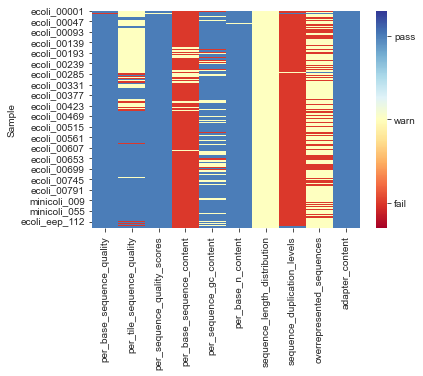

In [12]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [13]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [14]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] == 'fail').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

per_base_sequence_quality per_sequence_quality_scores  \
Sample                                                              
ecoli_00013                      fail                        warn   
ecoli_00069                      fail                        pass   
ecoli_00076                      fail                        pass   

            per_base_n_content adapter_content  
Sample                                          
ecoli_00013               pass            pass  
ecoli_00069               fail            pass  
ecoli_00076               fail            pass

<font size="4">Mark samples as failed.</font>

In [15]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Read Alignment Percentage

In [17]:
align_cols = ['Assigned']
total_alignment = DF_qc_stats[align_cols].sum(axis=1)
percent_alignment = total_alignment.divide(DF_qc_stats['Total'])*100

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

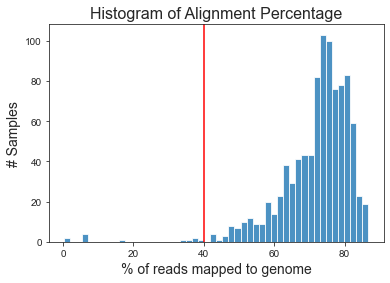

In [18]:
fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [19]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

Total  Assigned  Unassigned_rRNA  Unassigned_Unmapped  \
Sample                                                                    
ecoli_00151     3906008   1537833          1479914                55929   
ecoli_00156     4833809     14785          3893423               251465   
ecoli_00367     6409073   2396849          2999202                80540   
ecoli_00403     4837452    809302          3361607               175788   
ecoli_00726     9009414     31284          3668370               859929   
ecoli_00799     4206750   1593431           416287                97804   
ecoli_00800     6136173   2135300          1522795               234165   
minicoli_005    2898115   1052668           160744              1214712   
ecoli_eep_005  12188565    726829            10586             10993290   
ecoli_eep_006  13015021    820004            31015             11676995   
ecoli_eep_007  12627923    781404            11586             11390353   
ecoli_eep_008  16604886   1062648            15882             14950419   

               Unassigned_Read_Type  Unassigned_Singleton  \
Sample                                                      
ecoli_00151                       0                     0   
ecoli_00156                       0                     0   
ecoli_00367                       0                     0   
ecoli_00403                       0                     0   
ecoli_00726                       0                     0   
ecoli_00799                       0                     0   
ecoli_00800                       0                     0   
minicoli_005                      0                     0   
ecoli_eep_005                     0                     0   
ecoli_eep_006                     0                     0   
ecoli_eep_007                     0                     0   
ecoli_eep_008                     0                     0   

               Unassigned_MappingQuality  Unassigned_Chimera  \
Sample                                                         
ecoli_00151                            0                   0   
ecoli_00156                            0                   0   
ecoli_00367                            0                   0   
ecoli_00403                            0                   0   
ecoli_00726                            0                   0   
ecoli_00799                            0                   0   
ecoli_00800                            0                   0   
minicoli_005                           0                   0   
ecoli_eep_005                          0                   0   
ecoli_eep_006                          0                   0   
ecoli_eep_007                          0                   0   
ecoli_eep_008                          0                   0   

               Unassigned_FragmentLength  Unassigned_Duplicate  ...  \
Sample                                                          ...   
ecoli_00151                         9857                     0  ...   
ecoli_00156                         3031                     0  ...   
ecoli_00367                       105408                     0  ...   
ecoli_00403                        47770                     0  ...   
ecoli_00726                        27719                     0  ...   
ecoli_00799                        12376                     0  ...   
ecoli_00800                        23901                     0  ...   
minicoli_005                       22273                     0  ...   
ecoli_eep_005                     110259                     0  ...   
ecoli_eep_006                     116875                     0  ...   
ecoli_eep_007                     125731                     0  ...   
ecoli_eep_008                     159604                     0  ...   

               r_written  bp_processed  quality_trimmed  bp_written  \
Sample                                                                
ecoli_00151      3922738     137295830           143152   135630362   
ecoli_0

In [20]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Aligned Read Count

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

Text(0.5, 1.0, 'Number of reads mapped to CDS')

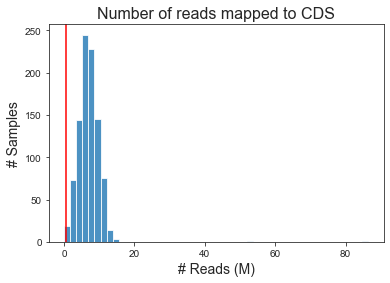

In [22]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [23]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

Total  Assigned  Unassigned_rRNA  Unassigned_Unmapped  \
Sample                                                                 
ecoli_00156  4833809     14785          3893423               251465   
ecoli_00726  9009414     31284          3668370               859929   

             Unassigned_Read_Type  Unassigned_Singleton  \
Sample                                                    
ecoli_00156                     0                     0   
ecoli_00726                     0                     0   

             Unassigned_MappingQuality  Unassigned_Chimera  \
Sample                                                       
ecoli_00156                          0                   0   
ecoli_00726                          0                   0   

             Unassigned_FragmentLength  Unassigned_Duplicate  ...  r_written  \
Sample                                                        ...              
ecoli_00156                       3031                     0  ...    4841148   
ecoli_00726                      27719                     0  ...    9033164   

             bp_processed  quality_trimmed  bp_written  percent_trimmed  \
Sample                                                                    
ecoli_00156     726172200          1536519   656317481         9.619580   
ecoli_00726     682613640          2339290   678983256         0.531836   

             pe_sense  pe_antisense  failed  se_sense  se_antisense  
Sample                                                               
ecoli_00156    0.8505        0.0637  0.0858       0.0           0.0  
ecoli_00726    0.4545        0.1599  0.3857       0.0           0.0  

[2 rows x 54 columns]

<font size="4">Mark samples as failed.</font>

In [24]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [25]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  4


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

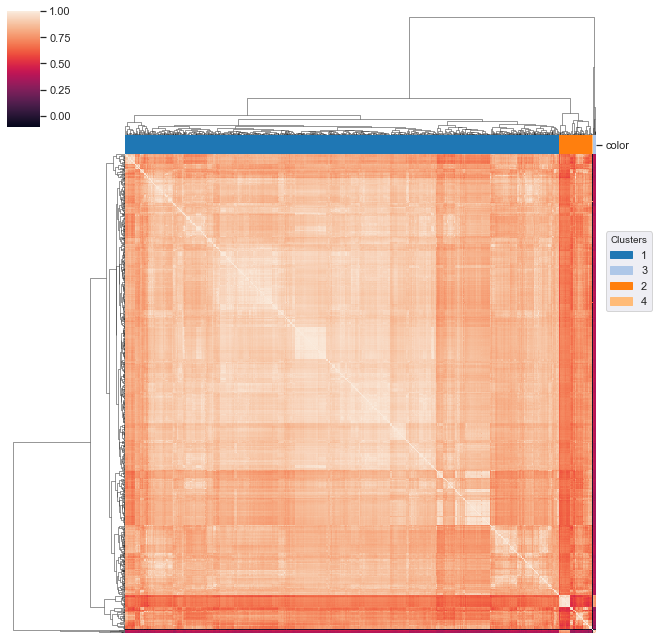

In [26]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [27]:
#indicate which clusters you want to remove
remove_clst = [3,4]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [28]:
clst[clst.cluster.isin(remove_clst)]

cluster                                              color
ecoli_00156         3  (0.6823529411764706, 0.7803921568627451, 0.909...
ecoli_00726         4     (1.0, 0.7333333333333333, 0.47058823529411764)
minicoli_001        3  (0.6823529411764706, 0.7803921568627451, 0.909...
minicoli_002        3  (0.6823529411764706, 0.7803921568627451, 0.909...
minicoli_003        3  (0.6823529411764706, 0.7803921568627451, 0.909...
minicoli_004        3  (0.6823529411764706, 0.7803921568627451, 0.909...
minicoli_005        3  (0.6823529411764706, 0.7803921568627451, 0.909...

In [29]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [30]:
DF_metadata.head()

sample_id    study  project condition  rep_id  \
ecoli_00001  control__wt_glc__1  Control  control    wt_glc       1   
ecoli_00002  control__wt_glc__2  Control  control    wt_glc       2   
ecoli_00003      fur__wt_dpd__1      Fur      fur    wt_dpd       1   
ecoli_00004      fur__wt_dpd__2      Fur      fur    wt_dpd       2   
ecoli_00005       fur__wt_fe__1      Fur      fur     wt_fe       1   

                 contact      creator run_date            Strain Description  \
ecoli_00001  Sangwoo Seo  Sangwoo Seo  4/17/13  Escherichia coli K-12 MG1655   
ecoli_00002  Sangwoo Seo  Sangwoo Seo  4/17/13  Escherichia coli K-12 MG1655   
ecoli_00003  Sangwoo Seo  Sangwoo Seo  10/2/13  Escherichia coli K-12 MG1655   
ecoli_00004  Sangwoo Seo  Sangwoo Seo  10/2/13  Escherichia coli K-12 MG1655   
ecoli_00005  Sangwoo Seo  Sangwoo Seo   9/5/13  Escherichia coli K-12 MG1655   

             Strain  ... phase  OD additional_notes sample_id.1 batch_zinc  \
ecoli_00001  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00002  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00003  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00004  MG1655  ...   NaN NaN              NaN         NaN        NaN   
ecoli_00005  MG1655  ...   NaN NaN              NaN         NaN        NaN   

            feed_zinc  Swift  Organism LibraryLayout.1 Platform.1  
ecoli_00001       NaN    NaN       NaN             NaN        NaN  
ecoli_00002       NaN    NaN       NaN             NaN        NaN  
ecoli_00003       NaN    NaN       NaN             NaN        NaN  
ecoli_00004       NaN    NaN       NaN             NaN        NaN  
ecoli_00005       NaN    NaN       NaN             NaN        NaN  

[5 rows x 115 columns]

# Remove Failed Samples

In [31]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [32]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

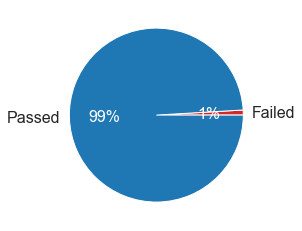

In [33]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Replicates

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. </font>

## Replicate Correlations

In [ ]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project'].str.cat(
    DF_metadata_passed.loc[:,'condition'],sep=':'
)

In [ ]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

Median Pearson R between replicates: 0.99


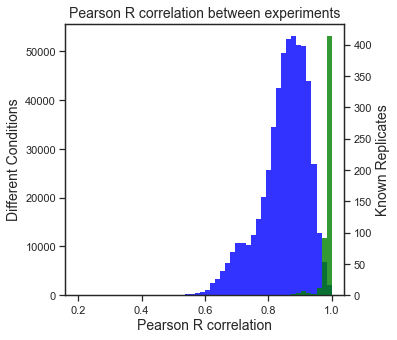

In [37]:
sns.set_style('ticks')

fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [ ]:
dissimilar = []
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.95]:
    dissimilar.append(x[0][0])
    dissimilar.append(x[0][1])
dissimilar = set(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)
#Changed condition ID to index

## Number of Replicates

In [39]:
DF_metadata_passed_input = DF_metadata_passed[DF_metadata_passed['passed_similar_replicates']]

In [41]:
# Drop Samples with no replicates
cond_counts = DF_metadata_passed_input.condition.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
print(len(drop_conds))
drop_conds

53


Index(['bw_delmntr', 'glu_ale6', 'xyl_ale2', 'wt_044', 'wt_42c', 'glc_ale2',
       'glyc_ale2', 'PD-009_del-tnaA_Batch_6h', 'rpoBE546V_044', 'glc_ac_ac2',
       'glu_ale3', 'glc_ale1', 'PD-004_del-qseB_Batch_6h', '42c_ale2',
       'xyl_ale3', 'glu_ale10', 'bw_delnac_glc', 'rpoBE546V_031', '42c_ale6',
       'delgadx_ph5', 'wt_xyl', 'glc_glyc_glyc', '42c_ale1', 'glu_ale5',
       '42c_ale3', 'glc_xyl_glc', 'bw_delcra_glc', 'glyc_ale1', 'wt_031',
       'PD-009_del-baeR_Fed-batch_18h', 'wt_ade', 'glc_glyc_glc', 'glu_ale8',
       'nitr_031', 'sdh_ale2', '5drib_ale10', 'lyx_ale2_f6', 'bw_delnac_ade',
       'glc_ac_glc1', '42c_ale5', '42c_ale10', 'wt_trp', '42c_ale8',
       'rpoBE546V_glc', 'glu_ale9', 'PD-009_del-tnaA_Fed-batch_6h', 'glc_ale3',
       'bw_delcra_trp', '42c_ale4', 'glc_xyl_xyl', 'xyl_ale1', '42c_ale9',
       'pgi_ale2'],
      dtype='object')

In [42]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_id.isin(drop_conds)

## Remove Replicate Failures

We will allow samples without replicates as our overall confidence in the experimental method based on other biological replicate correlations is very high.

In [43]:
qc_columns = ['passed_similar_replicates']

In [44]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

We've determined that the putrescine project has serious issues, let's drop it entirely here:

In [45]:
DF_metadata_final = DF_metadata_final[DF_metadata_final['project'] != 'ptrc_reg']

In [46]:
DF_metadata_final.shape

(1033, 115)

In [47]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Remove Small Genes and Low FPM

Small genes are less than 100 nt; these tend to add noise without improving regulon recovery

In [ ]:
gene_info = pd.read_csv('../../data/annotation/gene_info.csv', index_col=0)
short_genes = gene_info[(gene_info.end-gene_info.start+1)<100].index.to_list()

counts = pd.read_csv('../../data/precise2/counts.csv', index_col=0)
fpm = counts.divide(counts.sum(axis=0)) * (10**6)
assert fpm['ecoli_00001'].sum() == 1000000
low_fpm_genes = fpm.loc[fpm.max(axis=1) < 10].index.to_list()
drop_genes = list(dict.fromkeys(low_fpm_genes + short_genes)) # dict.fromkeys step removes duplicates

In [56]:
DF_log_tpm_final = DF_log_tpm_final.drop(index=drop_genes, errors='ignore')
DF_log_tpm_final.shape

(4211, 1033)

# Save Final QCed Datasets

In [16]:
# Define centering reference condition as "control" project, growth in M9 medium with glucose
reference = ['ecoli_00001','ecoli_00002']

In [58]:
# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm = DF_log_tpm_final.sub(DF_log_tpm_final[reference].mean(axis=1),axis=0)

In [59]:
DF_log_tpm_final.to_csv(os.path.join(org_dir,'log_tpm_qc.csv'))
DF_log_tpm_norm.to_csv(os.path.join(org_dir,'log_tpm_norm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(org_dir,'metadata_qc.csv'))